In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score
# !pip install graphviz

Load and split dataset into train and test set

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Set Class names

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Reshape dataset as CNN expects single tensor of image_height, image_width, color_channels

In [4]:
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

Normalize pixel values to be between 0 and 1

In [5]:
train_images = train_images.astype("float32")/255 
test_images = test_images.astype("float32")/255

One hot encode the labels

In [6]:
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

Building CNN model

In [7]:
model_cnn = tf.keras.Sequential([
      Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
      MaxPooling2D(2, 2),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Flatten(),
      Dense(128, activation='relu'),  
      Dense(10, activation='softmax')
])

Model architecture

In [8]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Compile CNN model

In [9]:
model_cnn.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [10]:
history = model_cnn.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4466 - accuracy: 0.8368 - val_loss: 0.3532 - val_accuracy: 0.8725
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2986 - accuracy: 0.8906 - val_loss: 0.2970 - val_accuracy: 0.8900
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2496 - accuracy: 0.9090 - val_loss: 0.2843 - val_accuracy: 0.8989
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2180 - accuracy: 0.9191 - val_loss: 0.2495 - val_accuracy: 0.9080
Epoch 5/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1920 - accuracy: 0.9281 - val_loss: 0.2752 - val_accuracy: 0.9024


Evaluate the model

In [11]:
score = model_cnn.evaluate(test_images, test_labels)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 5ms/step - loss: 0.2752 - accuracy: 0.9024
Loss: 0.2752
Accuracy: 0.9024


Visualizing loss and accuracy

In [12]:
def plot_history(key):
    plt.figure(figsize=(16,10))
    val = plt.plot(history.epoch, history.history['val_'+key], '--', label='validation_' + key)
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),label= 'training_' + key)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.xlim([0,max(history.epoch)])

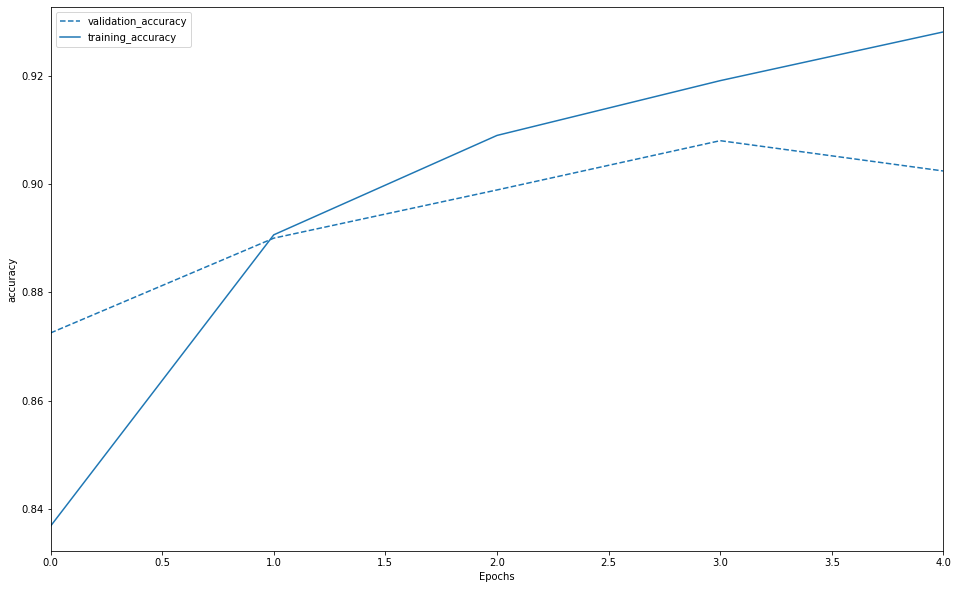

In [13]:
plot_history('accuracy')

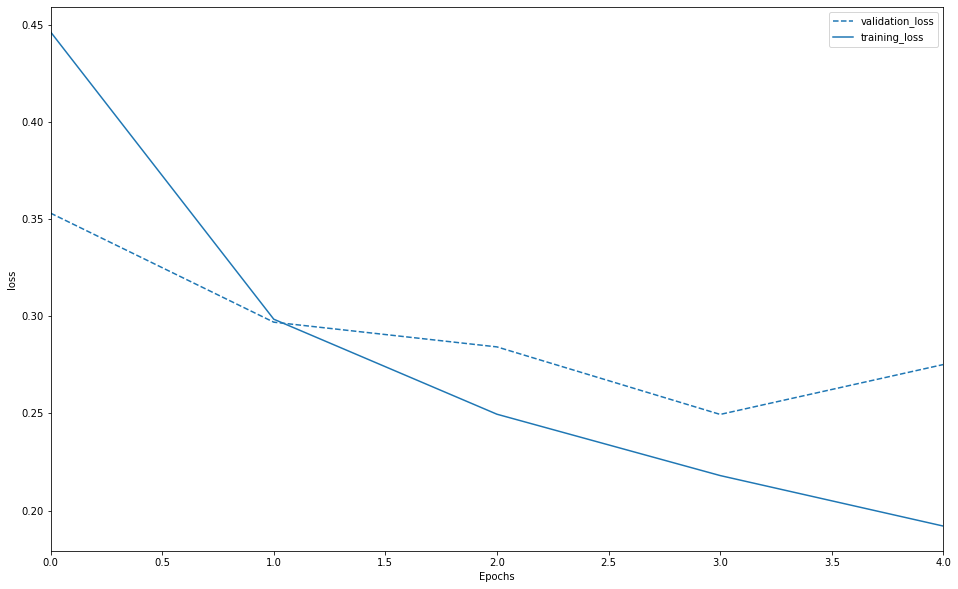

In [14]:
plot_history('loss')

Build Confusion Matrix

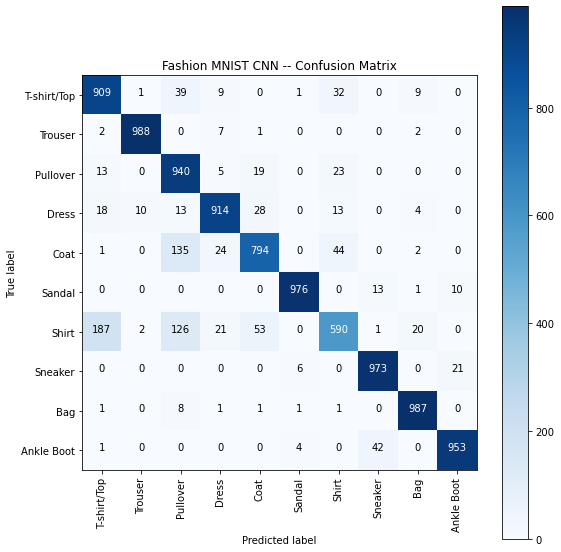

In [15]:
from sklearn.metrics import confusion_matrix
from itertools import product

classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

#Create Multiclass Confusion Matrix

preds = model_cnn.predict(test_images)
cm = confusion_matrix(np.argmax(test_labels,axis=1), np.argmax(preds,axis=1))

plt.figure(figsize=(8,8))
plt.imshow(cm,cmap=plt.cm.Blues)
plt.title('Fashion MNIST CNN -- Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(10), classes, rotation=90)
plt.yticks(np.arange(10), classes)

for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > 500 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label');

From confusion matrix, we can see the majority of confusion occurs for items shaped like a top (e.g shirt, T-shirt, pullover), and for ankle boot mixed up with sneakers. This implies that convolution layers have focused in on meaning features since categories with similar shaped features are mixed up and distinct categories are not mixed up.

In [16]:
print(classification_report(np.argmax(test_labels,axis = 1), np.argmax(preds,axis=1), target_names = classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.80      0.91      0.85      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.75      0.94      0.83      1000
       Dress       0.93      0.91      0.92      1000
        Coat       0.89      0.79      0.84      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.84      0.59      0.69      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.96      0.99      0.97      1000
  Ankle Boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



Assuming there are no significant imbalance of classes in dataset, we can opt for macro or weighted average aggreagation method to calculate the overall precision and recall for this dataset.

In [17]:
f1_score(np.argmax(test_labels,axis = 1), np.argmax(preds,axis=1), average='macro')

0.9001415897841112

In [18]:
f1_score(np.argmax(test_labels,axis = 1), np.argmax(preds,axis=1), average='micro')

0.9024

In [19]:
f1_score(np.argmax(test_labels,axis = 1), np.argmax(preds,axis=1), average='weighted')

0.9001415897841111

In [20]:
# Shared Input Layer
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 61, 61, 32)   544         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 30, 30, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 1)    0           input_1[0][0]                    
______________________________________________________________________________________________

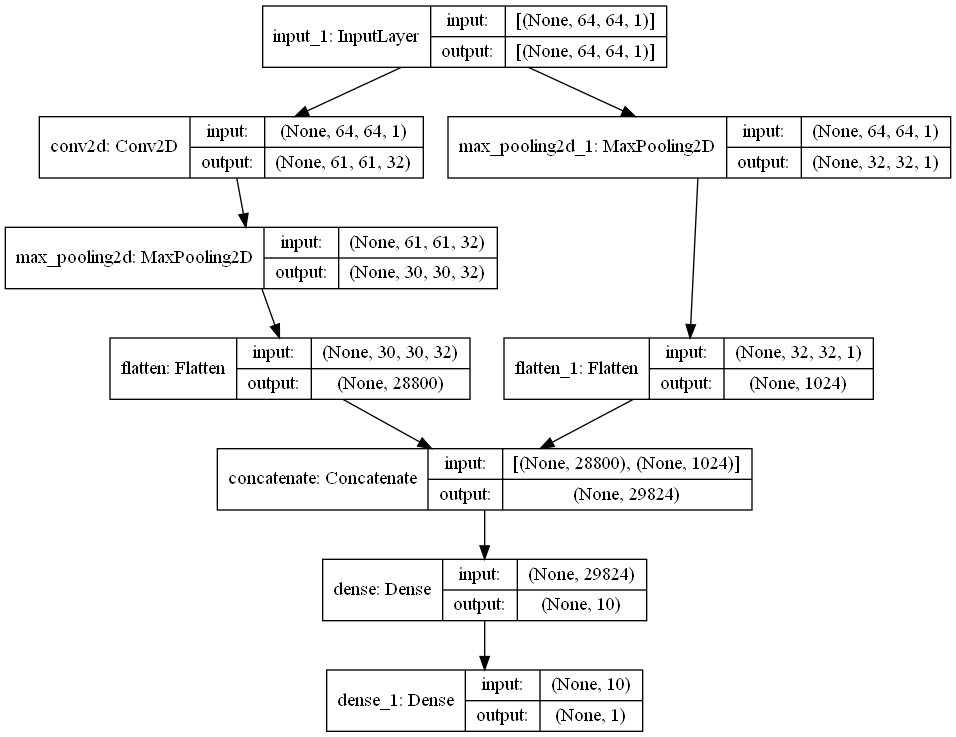

In [21]:
# input layer
visible = Input(shape=(64,64,1))
# 1st Branch
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)
# 2nd Branch
pool2 = MaxPooling2D(pool_size=(2, 2))(visible)
flat2 = Flatten()(pool2)
# merge feature extractors
merge = concatenate([flat1, flat2])
# interpretation layer
hidden1 = Dense(10, activation='relu')(merge)
# prediction output
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='shared_input_layer.png', show_shapes=True)